# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [237]:
pip install numpy opencv-python scikit-learn


## Import libraries

In [238]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt



## Mount Google Drive

In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

In [240]:
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

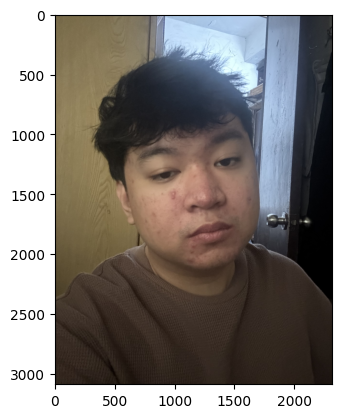

In [241]:
displayImage('/content/drive/My Drive/ML pics/Train/Allen/IMG_3612.jpg')

## 2. Load the images from your drive and apply preprocessing to your raw images

In [242]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [243]:
images, labels = load_images_from_folder('/content/drive/My Drive/ML pics/Train')

In [244]:
images.shape

(220, 10000)

In [245]:
labels.shape

(220,)

In [246]:
labels

array(['Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh',
       'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Josh', 'Allen', 'Allen',
    

## 3. Display one pre-processed image from the training set

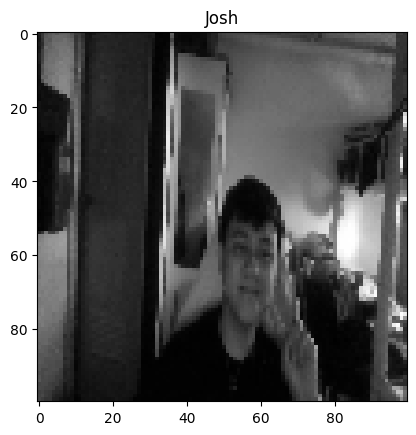

In [247]:
# Get a sample image and its corresponding name
image = images[0].reshape(100,100)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

## 4. Display ten pre-processed images from the training set

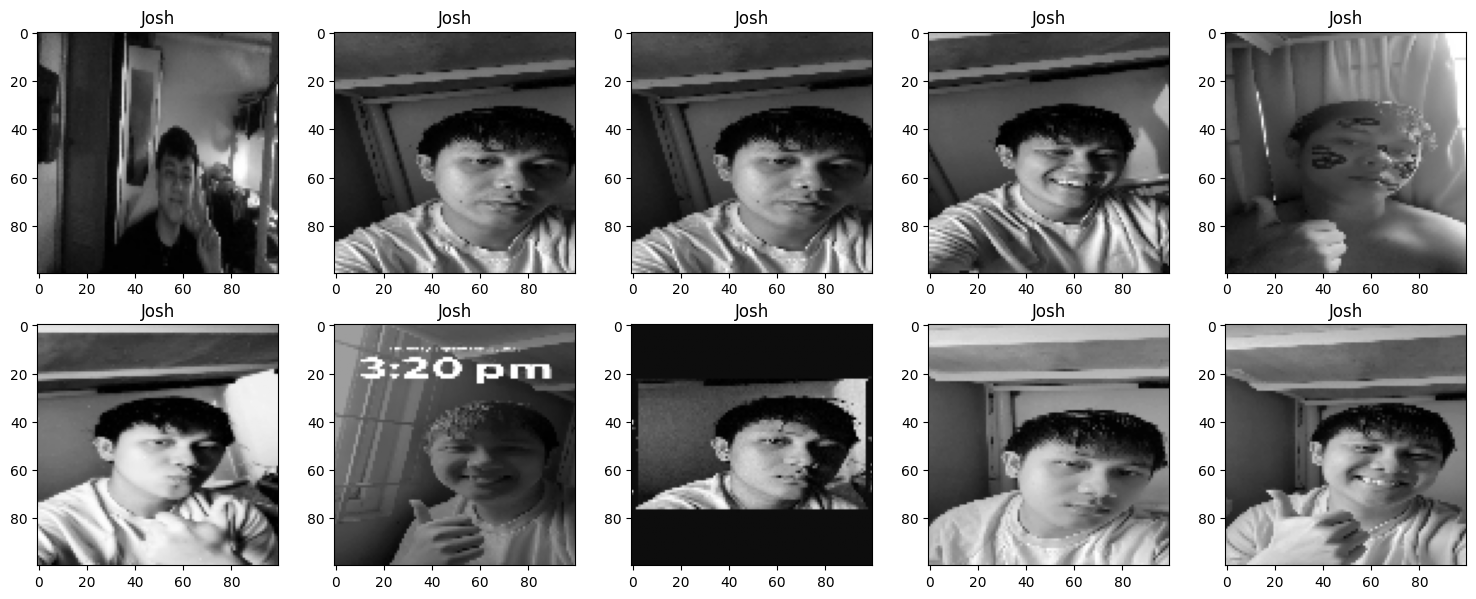

In [248]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()


## 5. Split your training data

In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 6. Train your SVM model

In [250]:
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [251]:

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.91%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

Predicted label: ['Josh']


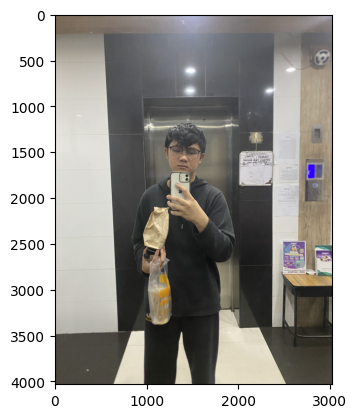

In [252]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_8701.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)


Predicted label: ['Allen']


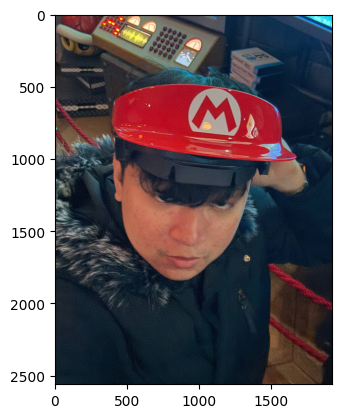

In [253]:

img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872703_w.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


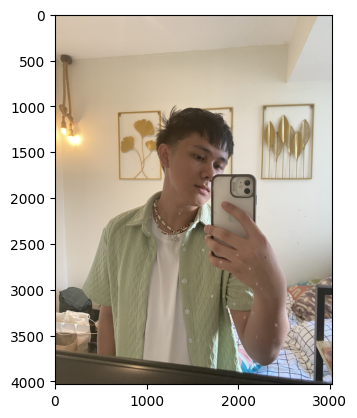

In [254]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_9294.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


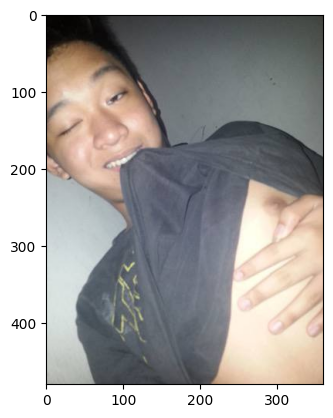

In [255]:
img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872697_x.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


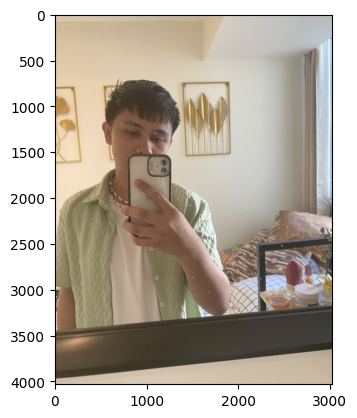

In [256]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_9280.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


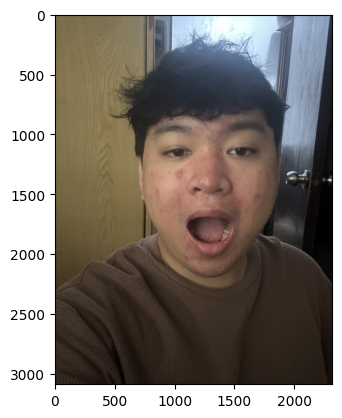

In [257]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_3567.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


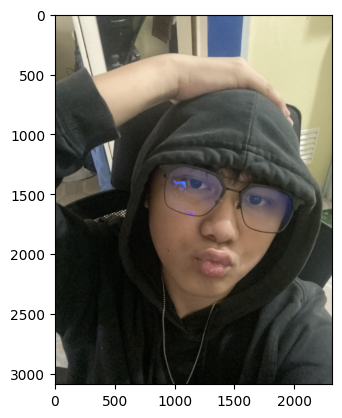

In [258]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_8659.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


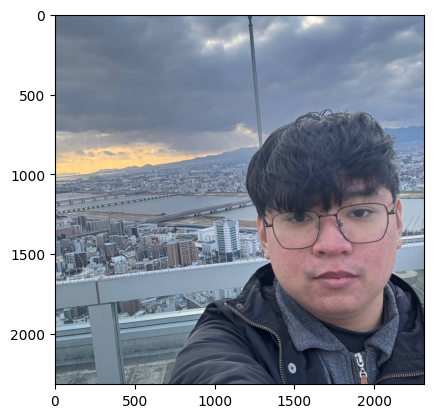

In [259]:
img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872699_w.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


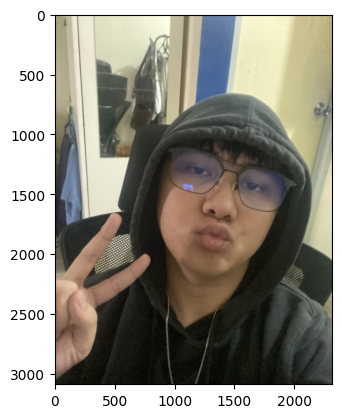

In [260]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_8658.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


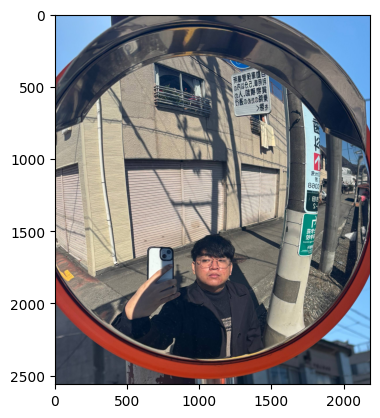

In [261]:
img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872708_w.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


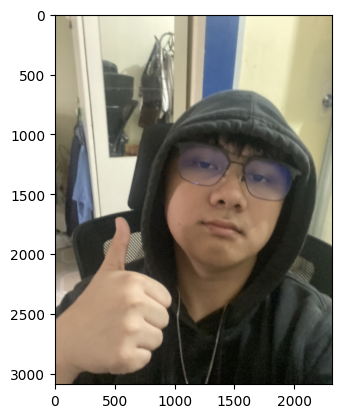

In [262]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_8657.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


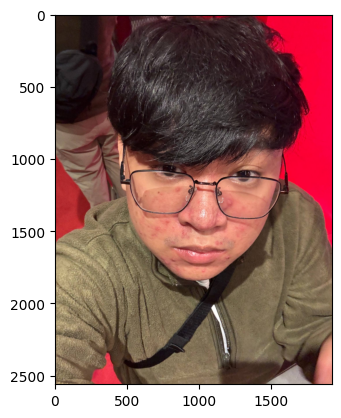

In [263]:
img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872710_w.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


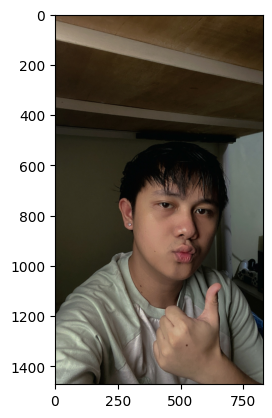

In [264]:
img_path = '/content/drive/My Drive/ML pics/Test/5D252AEB-7B2D-40BF-AF54-7F5CD96A867B.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


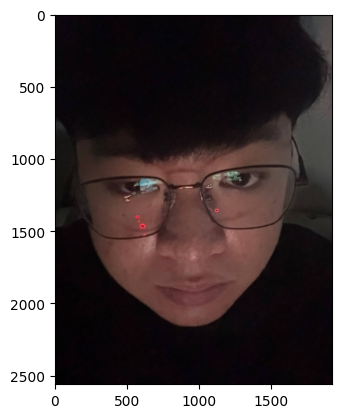

In [265]:
img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872711_w.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


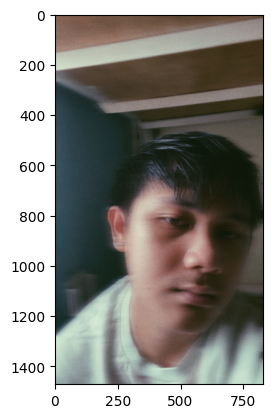

In [266]:
img_path = '/content/drive/My Drive/ML pics/Test/05B8622B-3504-48A2-A0D0-D86C3B7B4536.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


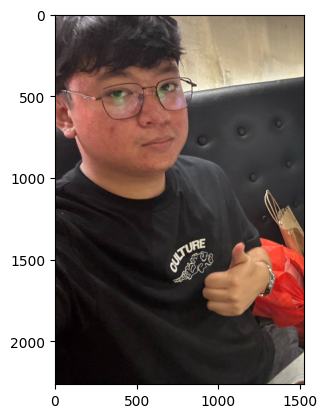

In [267]:
img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872712_w.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


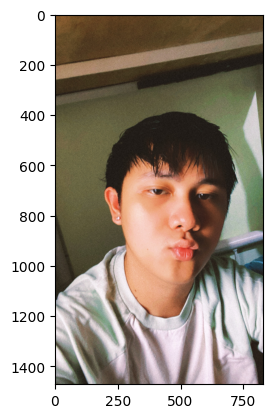

In [268]:
img_path = '/content/drive/My Drive/ML pics/Test/2AC1EE34-3E24-42B4-B778-5E7E08827794.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


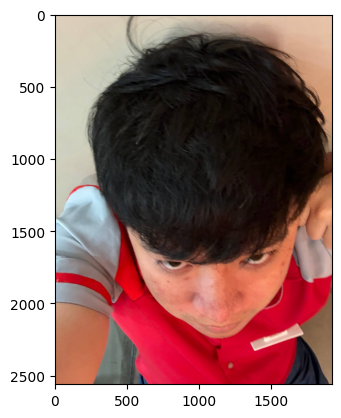

In [269]:
img_path = '/content/drive/My Drive/ML pics/Test/photo_6258012065079872715_w.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Josh']


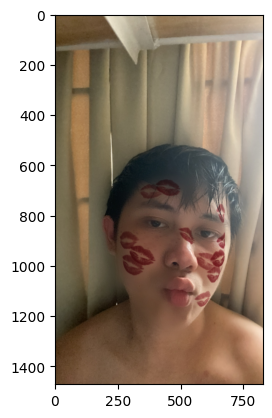

In [270]:
img_path = '/content/drive/My Drive/ML pics/Test/1CB1DD79-B494-4A13-961F-0426BF8EB4C7.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Allen']


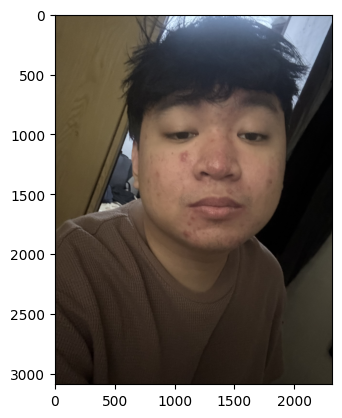

In [271]:
img_path = '/content/drive/My Drive/ML pics/Test/IMG_3515.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

In [272]:
import pandas as pd

def load_test_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
        images.append(img.flatten())  # Flatten the image
        filenames.append(filename)
    return np.array(images), np.array(filenames)

# Load test images
test_images, test_filenames = load_test_images_from_folder('/content/drive/My Drive/ML pics/Test')

# Make predictions on test images
test_predictions = model.predict(test_images)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'Filename': test_filenames,
    'Predicted_Label': test_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)

print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
